# IndonesiaAI Machine Learning Portfolio Project 3

## Assignment: House Price Prediction in the Real Estate Industry

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [169]:
np.__version__

'1.23.5'

In [170]:
tf.__version__

'2.10.0'

In [171]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [172]:
tf.config.experimental.get_device_details(physical_devices[0])

{'device_name': 'NVIDIA GeForce RTX 3070 Laptop GPU',
 'compute_capability': (8, 6)}

## Loading in the Datasets

In [173]:
df_train = pd.read_csv("train.csv")

In [174]:
pd.options.display.min_rows = 100
pd.set_option("display.max_columns", None)

In [175]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

## Data Understanding

### Feature Information

In [176]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing Values

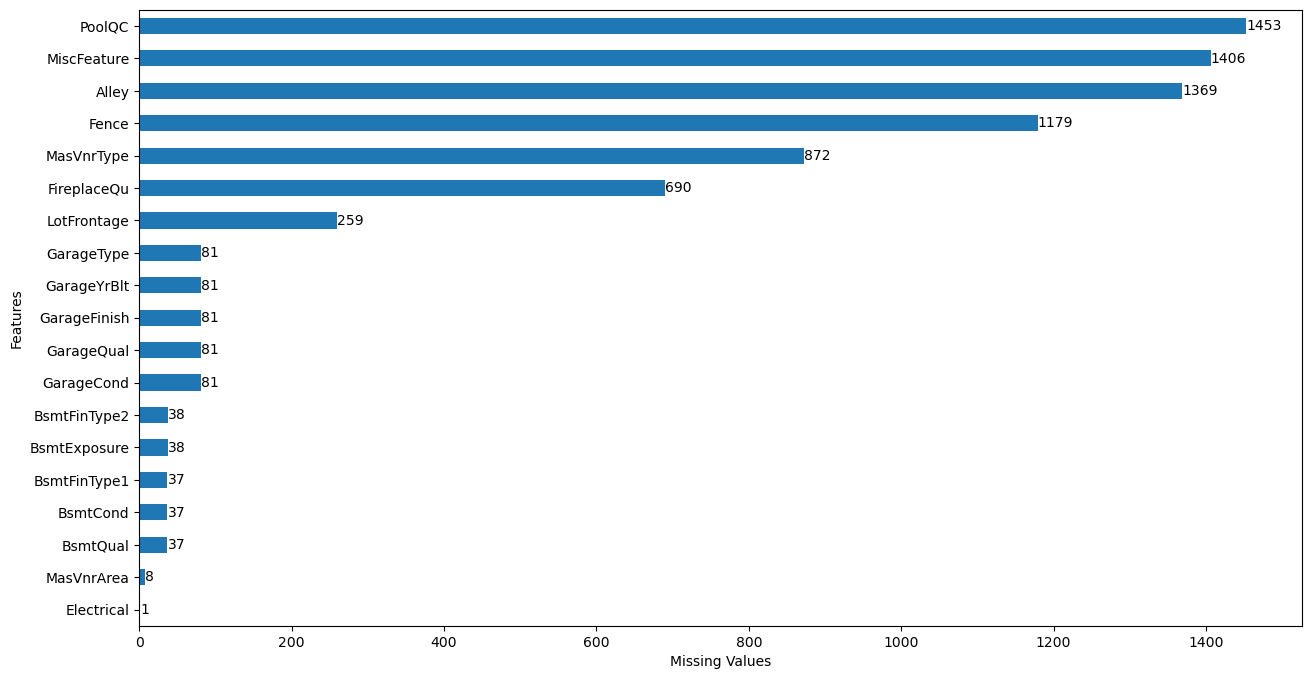

In [177]:
#Missing Data in Train Dataset
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=True)

plt.figure(figsize=(15, 8))
ax = missing.plot.barh()

plt.xlabel("Missing Values")
plt.ylabel("Features")

for i, v in enumerate(missing):
    ax.text(v + 0.1, i, str(v), color='black', va='center')

plt.show()

In [178]:
def missing_values(df, set='Train'):
    missing_value_counts = df.isnull().sum()
    missing_value_counts = missing_value_counts[missing_value_counts > 0].sort_values(ascending=False)
    missing_value_percentage = round(missing_value_counts * 100 / len(df), 2).astype(str) + ' %'
    missing_values = pd.concat([missing_value_counts, missing_value_percentage], axis=1, keys=['Missing Values', 'Percent'])
    return missing_values

In [179]:
missing_values(df_train)

,Missing Values,Percent
PoolQC,1453,99.52 %
MiscFeature,1406,96.3 %
Alley,1369,93.77 %
Fence,1179,80.75 %
MasVnrType,872,59.73 %
FireplaceQu,690,47.26 %
LotFrontage,259,17.74 %
GarageType,81,5.55 %
GarageYrBlt,81,5.55 %
GarageFinish,81,5.55 %


### Statistical Exploration

In [180]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### EDA

In [181]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

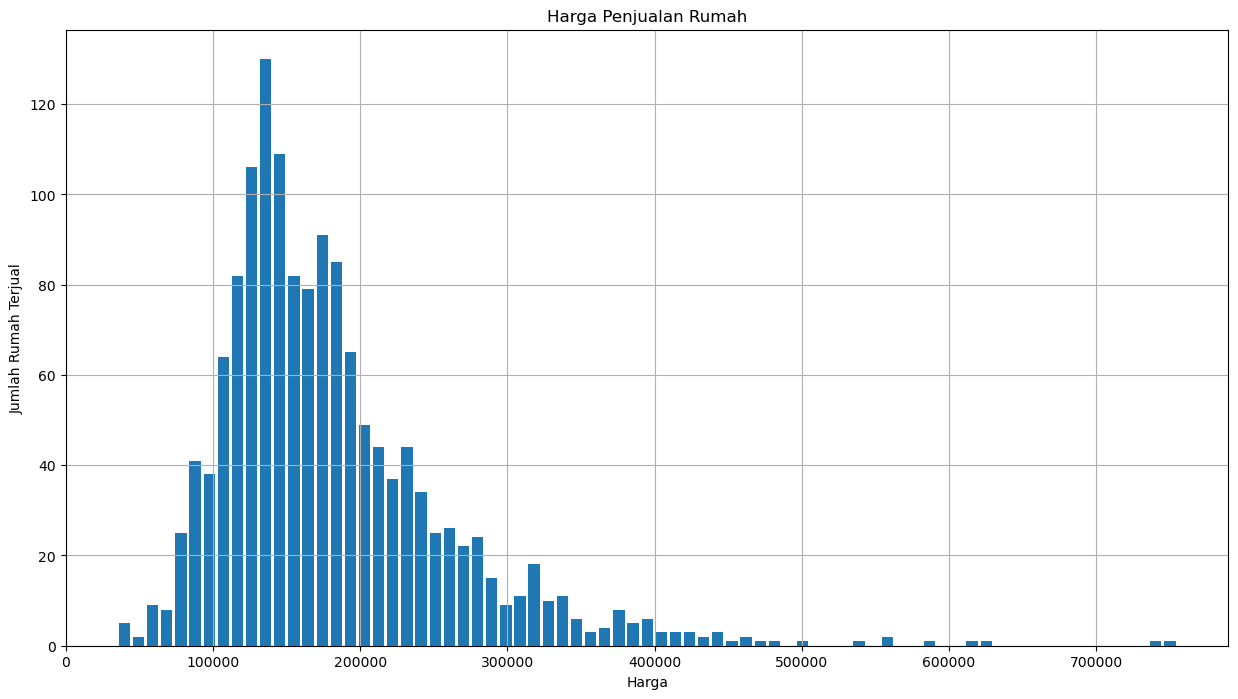

In [182]:
df_train['SalePrice'].hist(bins=75, rwidth=.8, figsize=(15,8))
plt.title('Harga Penjualan Rumah')
plt.ylabel('Jumlah Rumah Terjual')
plt.xlabel('Harga')
plt.show()

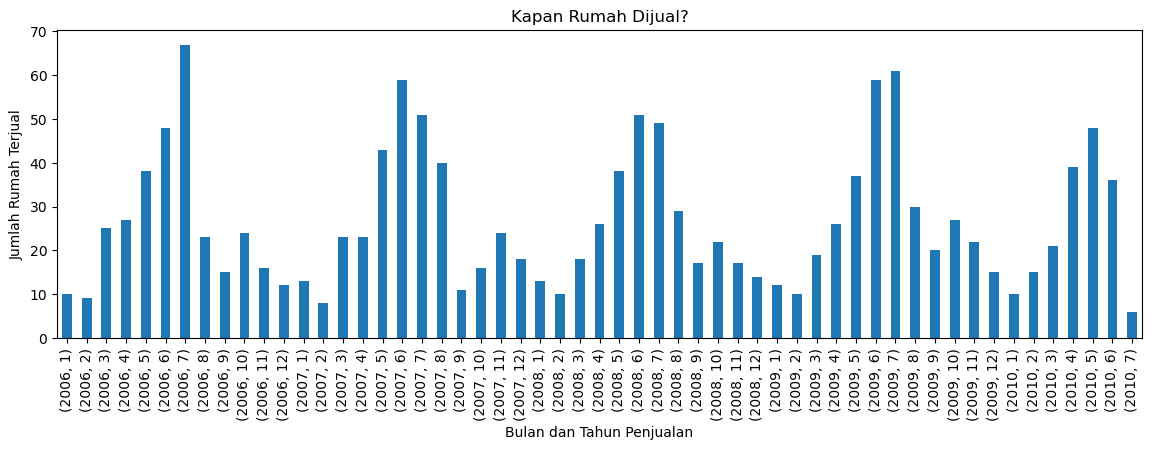

In [183]:
df_train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('Kapan Rumah Dijual?')
plt.ylabel('Jumlah Rumah Terjual')
plt.xlabel('Bulan dan Tahun Penjualan')
plt.show()

## Data Preprocessing & Feature Engineering

### Object Variables

In [184]:
df_train.select_dtypes(include=['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,NaN,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [185]:
df_train = df_train.drop(['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'], axis=1)
object_cols_train = df_train.select_dtypes(include=['object'])

cols_none = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','GarageCond']
object_cols_train[cols_none]= object_cols_train[cols_none].fillna('None')

cols_lownull = ['MSZoning','Utilities','Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']
object_cols_train[cols_lownull] = object_cols_train[cols_lownull].fillna(object_cols_train.mode().iloc[0])

In [186]:
object_cols_train.isnull().sum().sort_values(ascending=False).head(10)

MSZoning        0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
KitchenQual     0
dtype: int64

In [187]:
bin_map  = {'TA':2,'Gd':3, 'Fa':1,'Ex':4,'Po':1,'None':0,'Y':1,'N':0,'Reg':3,'IR1':2,'IR2':1,'IR3':0,"None" : 0,
            "No" : 2, "Mn" : 2, "Av": 3,"Gd" : 4,"Unf" : 1, "LwQ": 2, "Rec" : 3,"BLQ" : 4, "ALQ" : 5, "GLQ" : 6
            }

object_cols_train['ExterQual'] = object_cols_train['ExterQual'].map(bin_map)
object_cols_train['ExterCond'] = object_cols_train['ExterCond'].map(bin_map)
object_cols_train['BsmtCond'] = object_cols_train['BsmtCond'].map(bin_map)
object_cols_train['BsmtQual'] = object_cols_train['BsmtQual'].map(bin_map)
object_cols_train['HeatingQC'] = object_cols_train['HeatingQC'].map(bin_map)
object_cols_train['KitchenQual'] = object_cols_train['KitchenQual'].map(bin_map)
object_cols_train['GarageQual'] = object_cols_train['GarageQual'].map(bin_map)
object_cols_train['GarageCond'] = object_cols_train['GarageCond'].map(bin_map)
object_cols_train['CentralAir'] = object_cols_train['CentralAir'].map(bin_map)
object_cols_train['LotShape'] = object_cols_train['LotShape'].map(bin_map)
object_cols_train['BsmtExposure'] = object_cols_train['BsmtExposure'].map(bin_map)
object_cols_train['BsmtFinType1'] = object_cols_train['BsmtFinType1'].map(bin_map)
object_cols_train['BsmtFinType2'] = object_cols_train['BsmtFinType2'].map(bin_map)

PavedDrive =   {"N" : 0, "P" : 1, "Y" : 2}
object_cols_train['PavedDrive'] = object_cols_train['PavedDrive'].map(PavedDrive)

In [188]:
object_columns = object_cols_train.select_dtypes(include=['object'])
object_df_train = pd.get_dummies(object_cols_train, columns=object_columns.columns)
object_df_train

,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,4,2,4,2,2,6,1,4,1,4,2,2,2,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,Fals

In [189]:
object_df_train['LandContour_Lvl'].dtypes

dtype('bool')

### Numerical Variables

In [190]:
num_df_train = df_train.select_dtypes(exclude=[object])
num_df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [191]:
na_FloatFeature = ['LotFrontage','GarageYrBlt','MasVnrArea']

for na in na_FloatFeature:
  avg_value = num_df_train[na].mean()
  num_df_train[na].fillna(avg_value, inplace=True)

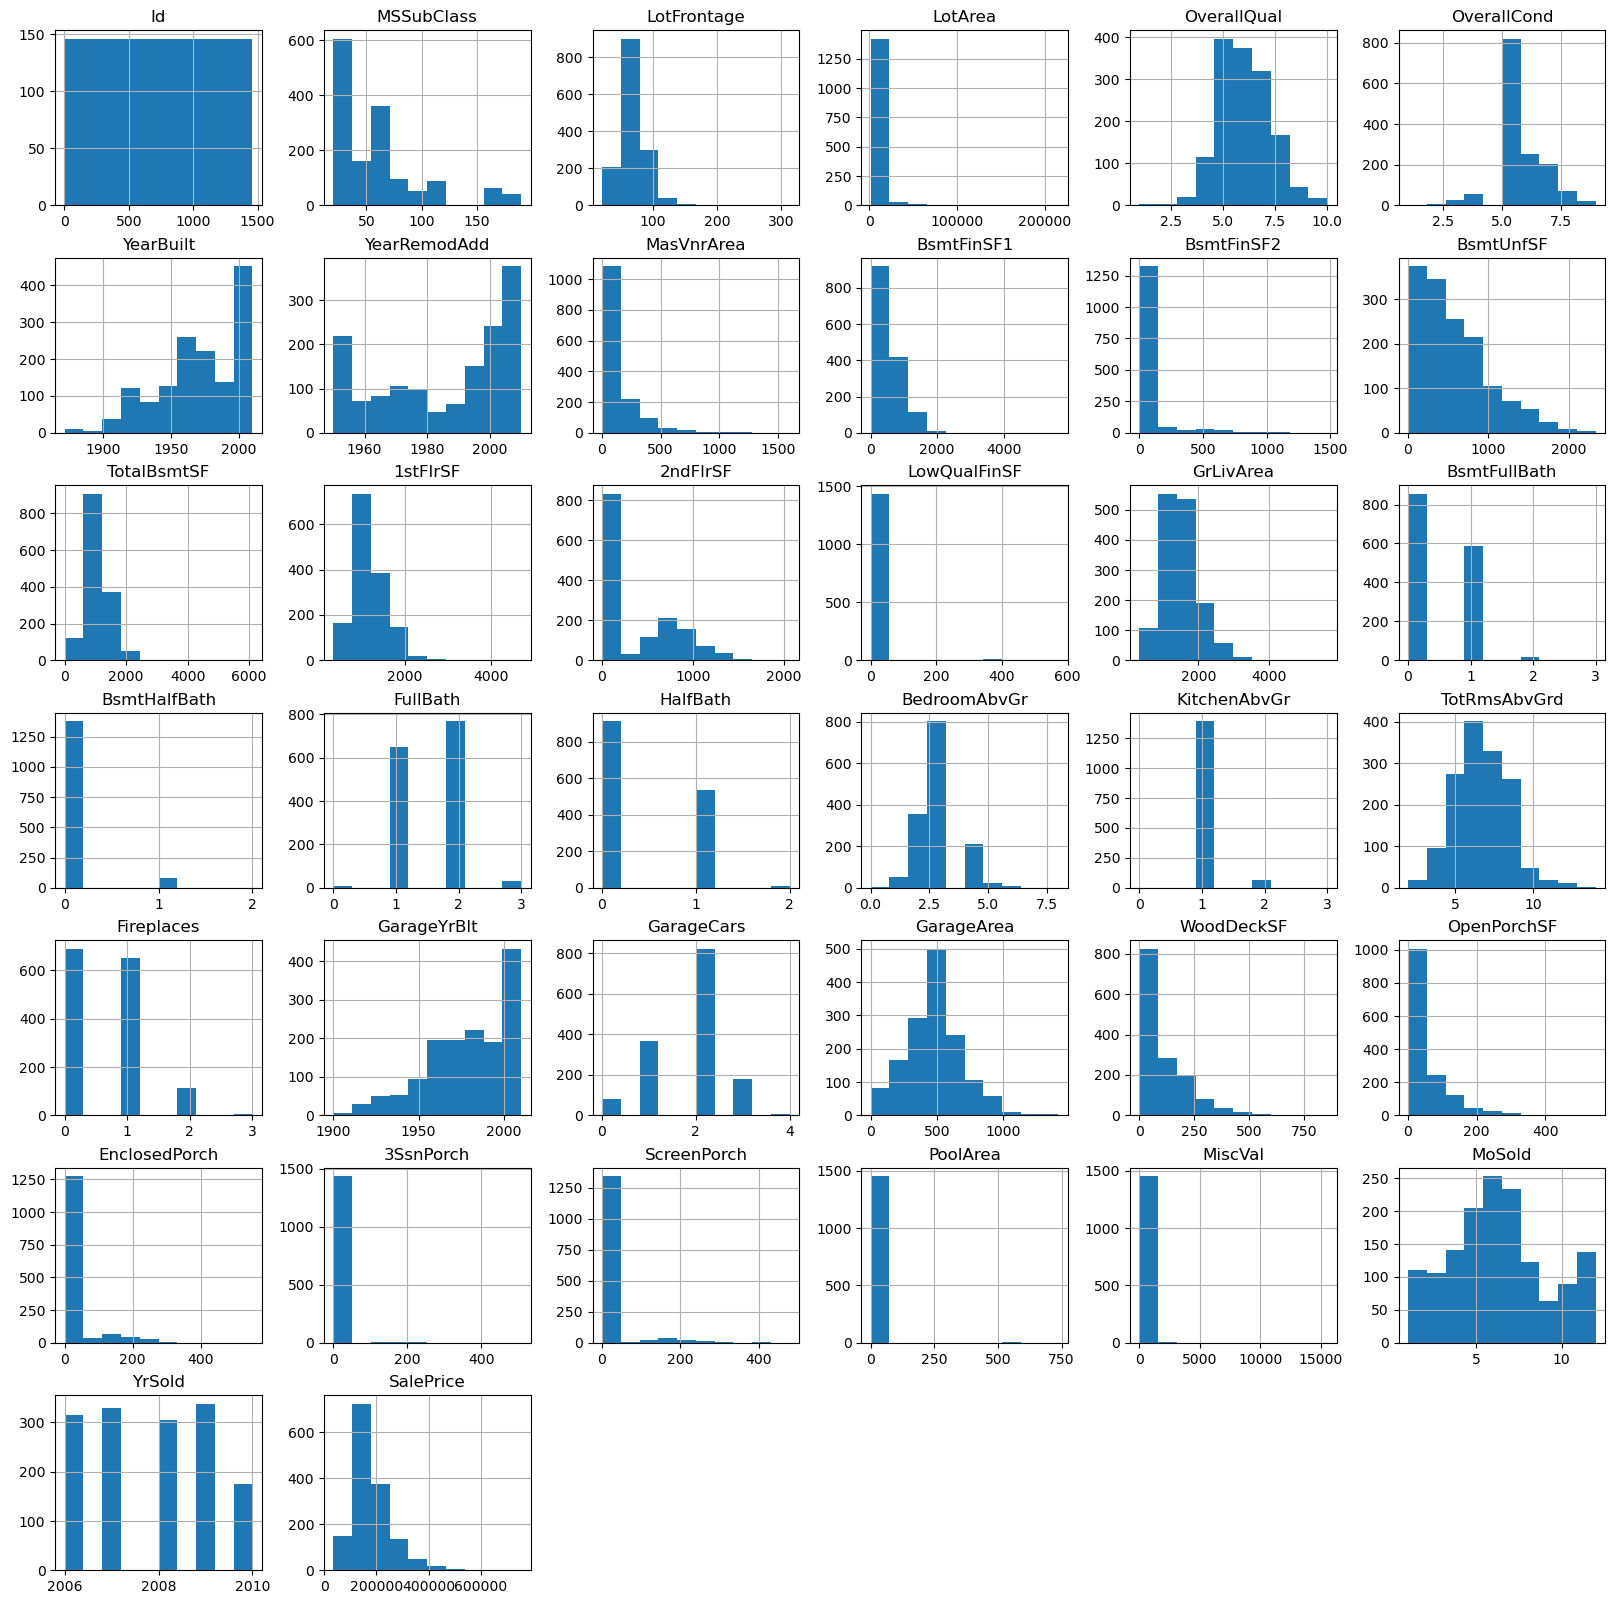

In [192]:
num_df_train.hist(figsize= (20,20))

plt.show()

In [193]:
num_df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [194]:
num_df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [195]:
num_df_train['OverallQual_GrLivArea'] = num_df_train['OverallQual'] * num_df_train['GrLivArea']
num_df_train['GrLivArea_log'] = np.log1p(num_df_train['GrLivArea'])
num_df_train['TotalBsmtSF_log'] = np.log1p(num_df_train['TotalBsmtSF'])
num_df_train['GarageArea_log'] = np.log1p(num_df_train['GarageArea'])

num_df_train['TotalArea'] = num_df_train['GrLivArea'] + num_df_train['TotalBsmtSF'] + num_df_train['GarageArea']

num_df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OverallQual_GrLivArea,GrLivArea_log,TotalBsmtSF_log,GarageArea_log,TotalArea
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,11970,7.444833,6.753438,6.308098,3114
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,7572,7.141245,7.141245,6.133398,2984
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12502,7.488294,6.825460,6.411818,3314
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,12019,7.448916,6.629363,6.466145,3115
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,17584,7.695758,7.044033,6.729824,4179


### Combining Dataset

In [196]:
train = pd.concat([num_df_train, object_df_train], axis=1, sort=False)

In [197]:
train.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
                        ..
Functional_Min2          0
Functional_Mod           0
Functional_Sev           0
Functional_Typ           0
GarageType_2Types        0
GarageType_Attchd        0
G

In [198]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,OverallQual_GrLivArea,GrLivArea_log,TotalBsmtSF_log,GarageArea_log,TotalArea,LotShape,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageQual,GarageCond,PavedDrive,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,11970,7.444833,6.753438,6.308098,3114,3,4,2,4,2,2,6,1,4,1,4,2,2,2,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False

In [199]:
vif_values = pd.DataFrame()
vif_values["feature"] = num_df_train.columns
vif_values["VIF"] = [VIF(num_df_train.values, i) for i in range(len(num_df_train.columns))]
vif_values

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,Id,4.121450e+00
1,MSSubClass,4.840862e+00
2,LotFrontage,1.795188e+01
3,LotArea,2.695561e+00
4,OverallQual,4.244167e+02
5,OverallCond,4.379654e+01
6,YearBuilt,2.370466e+04
7,YearRemodAdd,2.268865e+04
8,MasVnrArea,1.949986e+00
9,BsmtFinSF1,inf


# Machine Learning Model: Regression

### Train Test Split

In [200]:
target = train['SalePrice']
target = np.log(target)
train = train.drop(['SalePrice'], axis = 1)

### Feature Selection

In [201]:
names = train.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(train, target).coef_

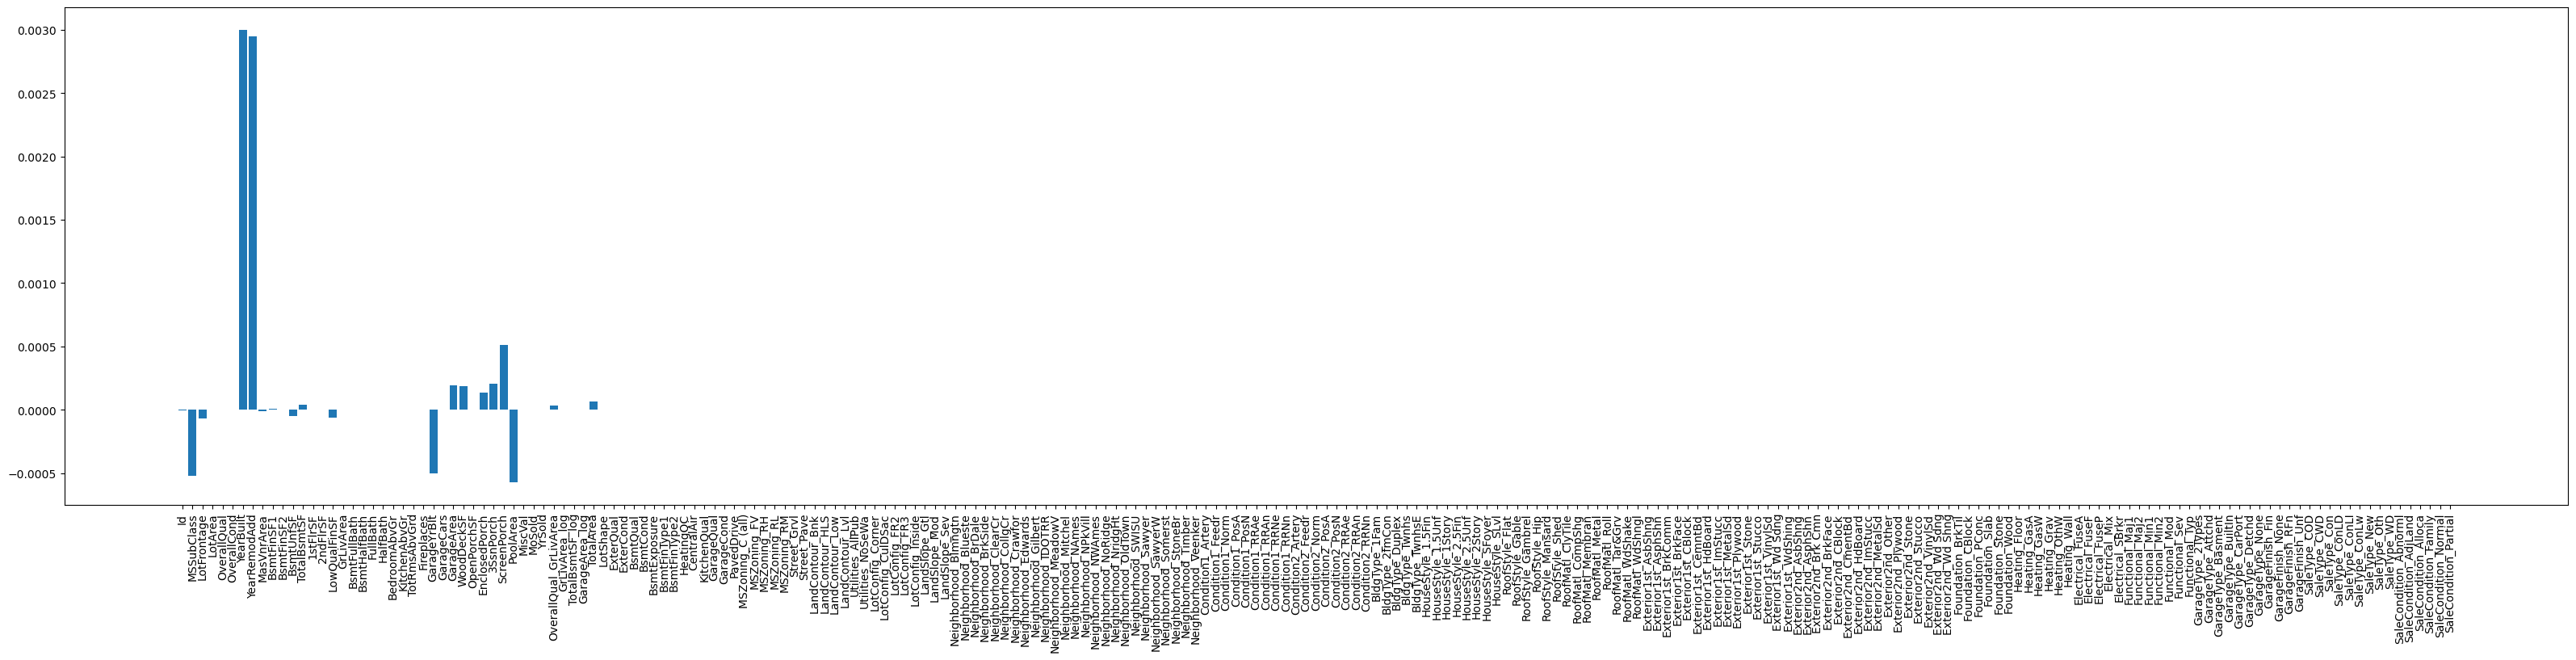

In [202]:
plt.figure(figsize=(40, 8))
plt.bar(names, lasso_coef)
plt.xticks(rotation = 90)
plt.show()

In [203]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state=42)

In [204]:
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train)
X_test_scaled = scaler.fit(X_test)

## Model 1: Linear Regression using Ordinary Least Squares

In [205]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [206]:
y_pred = reg.predict(X_test)

In [207]:
#R-Squared
r2 = reg.score(X_test, y_test)
print(f"R-Squared = {r2}")

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = True)
print(f"MSE = {mse}")

#Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE = {mse}")

R-Squared = 0.9090079603733375
MSE = 0.015436450567627671
RMSE = 0.12424351318128311


## Model 2: Random Forest Regression

In [208]:
rf_rgs = RandomForestRegressor(n_estimators=100, min_samples_leaf=0.12 , max_depth=4, random_state=42)
rf_rgs.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=0.12, random_state=42)

In [209]:
y_pred = rf_rgs.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
r2 = rf_rgs.score(X_test, y_test)
print(f"R2 Score: {r2}")

mean squared error:  0.05126021524058389
R2 Score: 0.6978404124699451


In [210]:
#R-Squared
r2 = rf_rgs.score(X_test, y_test)
print(f"R-Squared = {r2}")

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = True)
print(f"MSE = {mse}")

#Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE = {mse}")

R-Squared = 0.6978404124699451
MSE = 0.05126021524058389
RMSE = 0.22640718902142637


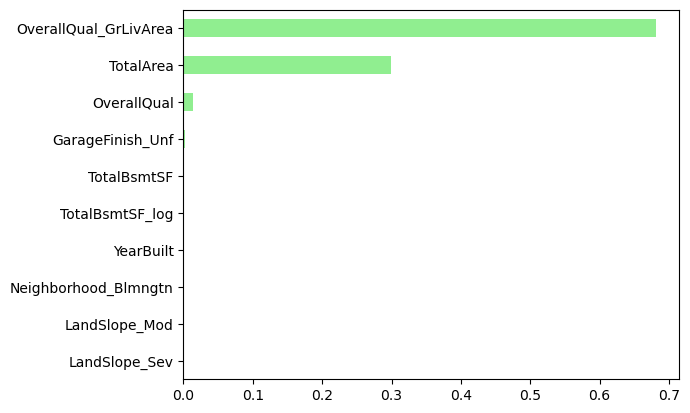

In [211]:
importance_rf = pd.Series(rf_rgs.feature_importances_, index = X_train.columns).sort_values()
importance_rf.iloc[-10:].plot(kind='barh', color = 'lightgreen')
plt.show()

In [220]:
params_rf = {
    'n_estimators':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_depth':[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_leaf': [0.04, 0.06, 0.08, 0.10],
    'max_features': ['auto', 'log2', 'sqrt'],
    'min_samples_split':[2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=10,
                       verbose=1,
                       n_jobs=-1)

grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 4320 candidates, totalling 43200 fits


c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
14400 fits failed out of a total of 43200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8494 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\base.py", line 637, in _validate_params

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100, None],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [0.04, 0.06, 0.08, 0.1],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='neg_mean_squared_error', verbose=1)

In [225]:
grid_rf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 0.04,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [222]:
best_model = grid_rf.best_estimator_

In [223]:
y_pred = best_model.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
r2 = best_model.score(X_test, y_test)
print(f"R2 Score: {r2}")

mean squared error:  0.037221717505631025
R2 Score: 0.7805920487092051


In [224]:
#R-Squared
r2 = best_model.score(X_test, y_test)
print(f"R-Squared = {r2}")

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = True)
print(f"MSE = {mse}")

#Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE = {mse}")

R-Squared = 0.7805920487092051
MSE = 0.037221717505631025
RMSE = 0.19292930701588865


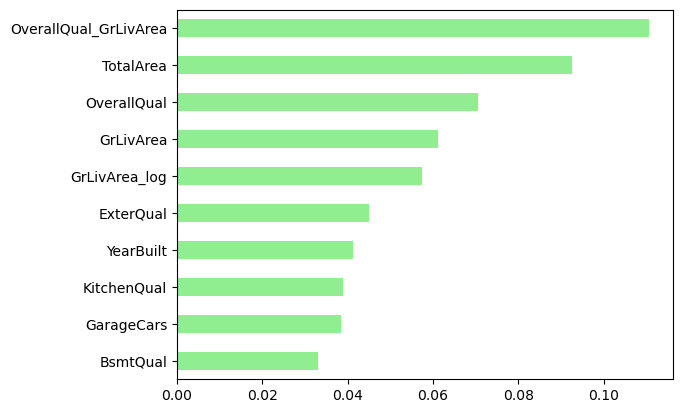

In [226]:
importance_rf = pd.Series(best_model.feature_importances_, index = X_train.columns).sort_values()
importance_rf.iloc[-10:].plot(kind='barh', color = 'lightgreen')
plt.show()

## Model 3: XGBoost

In [277]:
xgb_model = XGBRegressor( booster='gbtree', colsample_bytree=0.6, importance_type='gain', 
                         learning_rate=0.01, max_depth=4, n_estimators=2400, 
                         n_jobs=1, nthread=None, objective='reg:linear')

In [278]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [279]:
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_score = rmse(y_test, xgb_pred)
r2 = xgb_model.score(X_test, y_test)
print(f"R2 Score: {r2}")
print(f"RMSE: {xgb_score}")

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\core.py:160: UserWarning: [22:05:49] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


R2 Score: 0.9026328804967672
RMSE: 0.12852220983245274


In [251]:
params_xgb = {
    'n_estimators':[50, 100, 200, 400, 600, 800, 1000, 1200],
    'max_depth':[2, 3, 4, 5, 6, 7, 8, 9],
    'colsample_bytree':[0.5, 0.6, 0.7, 0.8, 0.9],
    'booster': ['gbtree', 'gblinear'],
    'subsample':[0.5,0.6, 0.7, 0.8, 0.9, 1],
    'reg_lambda':[0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2]
}
xgb_hyper = XGBRegressor(objective ='reg:squaredlogerror', nthread=-1, random_state=42)

random_xgb = RandomizedSearchCV(estimator=xgb_hyper,
                       param_distributions=params_xgb,
                       scoring='neg_mean_squared_error',
                       cv=5,
                       n_iter = 20,
                       verbose=1,
                       n_jobs=-1)

random_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          nthread=-1, num_parallel_tree=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                                        'n_estimators': [50, 100, 200, 400, 600,
                                                         800, 1000, 1200],
                                        'reg_lambda': [0.0001, 0.001, 0.01, 0.1,
                                                       0.5, 1, 1.5, 1.6, 1.7,
                                                       1.8, 1.9, 2],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='neg_mean_squared_error', verbose=1)

In [252]:
learning_rate_list = [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

learning_rate = []
rmse_score = []


for eta in learning_rate_list:
  xgb = XGBRegressor(learning_rate=eta,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  learning_rate.append(eta)


#create dataset eta
df_eta = pd.DataFrame({'learning_rate':learning_rate,
                       'rmse_score':rmse_score})

df_eta

,learning_rate,rmse_score
0,0.001,0.379681
1,0.010,0.217225
2,0.100,0.140329
3,0.200,0.137388
4,0.300,0.143609
5,0.400,0.145756
6,0.500,0.150387
7,0.600,0.156066
8,0.700,0.163243
9,0.800,0.179925


In [253]:
max_depth = []
rmse_score = []

for depth in range(1,21):
  xgb = XGBRegressor(max_depth=depth,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  max_depth.append(depth)


#create dataset eta
df_max_depth = pd.DataFrame({'max_depth':max_depth,
                       'rmse_score':rmse_score})
df_max_depth

,max_depth,rmse_score
0,1,0.136697
1,2,0.135034
2,3,0.131323
3,4,0.137172
4,5,0.136014
5,6,0.143609
6,7,0.145328
7,8,0.142117
8,9,0.146439
9,10,0.144230


In [260]:
n_estimators = []
rmse_score = []

for estimator in [50, 100, 200, 400, 800,1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600]:
  xgb = XGBRegressor(n_estimators=estimator).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  n_estimators.append(estimator)


#create dataset eta
df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                       'rmse_score':rmse_score})
df_estimator

,n_estimators,rmse_score
0,50,0.143669
1,100,0.143609
2,200,0.143643
3,400,0.143643
4,800,0.143643
5,1000,0.143643
6,1200,0.143643
7,1400,0.143643
8,1600,0.143643
9,1800,0.143643


In [255]:
subsample = []
rmse_score = []

for sub in [0.5,0.6, 0.7, 0.8, 0.9, 1]:
  xgb = XGBRegressor(subsample=sub,random_state=42).fit(X_train,y_train)
  rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
  rmse_score.append(rmse)
  subsample.append(sub)


#create dataset eta
df_subsample = pd.DataFrame({'subsample':subsample,
                       'rmse_score':rmse_score})
df_subsample

,subsample,rmse_score
0,0.5,0.144563
1,0.6,0.145700
2,0.7,0.143743
3,0.8,0.141213
4,0.9,0.139501
5,1.0,0.143609


In [256]:
reg_lambda = []
rmse_score = []

for lambda_ in [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2]:
    xgb = XGBRegressor(reg_lambda=lambda_,random_state=42).fit(X_train,y_train)
    rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
    rmse_score.append(rmse)
    reg_lambda.append(lambda_)

df_reg_lambda = pd.DataFrame({'reg_lambda':reg_lambda,
                       'rmse_score':rmse_score})
df_reg_lambda

,reg_lambda,rmse_score
0,0.0001,0.142625
1,0.0010,0.141169
2,0.0100,0.141887
3,0.1000,0.152344
4,0.5000,0.145304
5,1.0000,0.143609
6,1.5000,0.141088
7,1.6000,0.142574
8,1.7000,0.145291
9,1.8000,0.137637


In [259]:
reg_alpha = []
rmse_score = []

for alpha_ in [0.0001,0.001, 0.01, 0.1, 0.5, 1, 1.5,1.6,1.7,1.8,1.9,2]:
    xgb = XGBRegressor(reg_alpha=alpha_,random_state=42).fit(X_train,y_train)
    rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
    rmse_score.append(rmse)
    reg_alpha.append(alpha_)

df_reg_alpha = pd.DataFrame({'reg_alpha':reg_alpha,
                       'rmse_score':rmse_score})
df_reg_alpha

,reg_alpha,rmse_score
0,0.0001,0.142938
1,0.0010,0.143518
2,0.0100,0.141647
3,0.1000,0.143918
4,0.5000,0.141962
5,1.0000,0.140949
6,1.5000,0.140940
7,1.6000,0.141667
8,1.7000,0.136092
9,1.8000,0.140335


In [258]:
colsample_tree = []
rmse_score = []

for colsample_tree_ in [0.5, 0.6, 0.7, 0.8, 0.9]:
    xgb = XGBRegressor(colsample_bytree=colsample_tree_,random_state=42).fit(X_train,y_train)
    rmse = np.sqrt(mean_squared_error(y_test,xgb.predict(X_test)))
    rmse_score.append(rmse)
    colsample_tree.append(colsample_tree_)

df_colsample = pd.DataFrame({'colsample_bytree':colsample_tree,
                       'rmse_score':rmse_score})
df_colsample

,colsample_bytree,rmse_score
0,0.5,0.142420
1,0.6,0.140448
2,0.7,0.141490
3,0.8,0.138763
4,0.9,0.142925


In [280]:
xgb_model =XGBRegressor(booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=1.7, reg_lambda=1.8, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1, random_state=42)

xgb_model.fit(X_train, y_train)

c:\Users\marie\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\core.py:160: UserWarning: [22:09:37] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
             max_leaves=None, min_child_weight=1.5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [281]:
y_pred = xgb_model.predict(X_test)
print("mean squared error: ",mean_squared_error(y_test, y_pred))
r2 = xgb_model.score(X_test, y_test)
print(f"R2 Score: {r2}")

mean squared error:  0.058611368584631625
R2 Score: 0.654508142952882


In [282]:
#R-Squared
r2 = xgb_model.score(X_test, y_test)
print(f"R-Squared = {r2}")

#Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = True)
print(f"MSE = {mse}")

#Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE = {mse}")

R-Squared = 0.654508142952882
MSE = 0.058611368584631625
RMSE = 0.2420978491945594


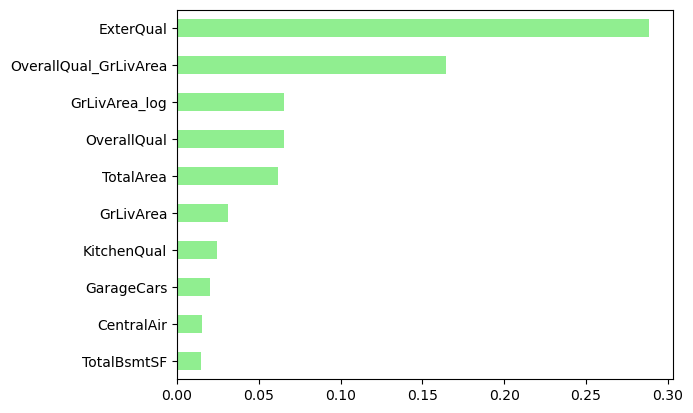

In [284]:
importance_xgb = pd.Series(xgb_model.feature_importances_, index = X_train.columns).sort_values()
importance_xgb.iloc[-10:].plot(kind='barh', color = 'lightgreen')
plt.show()

## Model 4: Deep Neural Networks

In [327]:
y_train = np.ravel(y_train)

X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

In [333]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation="relu", input_shape=[len(X_train.columns)]),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

In [334]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                3648      
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,793
Trainable params: 3,793
Non-trainable params: 0
_________________________________________________________________


In [335]:
class EarlyStoppingAtMinRMSE(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_root_mean_squared_error') is not None and logs.get('val_root_mean_squared_error') <= 0.5:
            print("\nValidation RMSE is low so cancelling training!")
            self.model.stop_training = True

callbacks = EarlyStoppingAtMinRMSE()

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9)

In [336]:
model.compile(
    optimizer='adam',
    loss= 'mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanSquaredError()]
)

In [337]:
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.20,
    batch_size=4,
    verbose=1,
    epochs=500,
    callbacks=[callbacks]
)

Epoch 1/500
205/205 [==============================] - 1s 5ms/step - loss: 9183.1406 - root_mean_squared_error: 95.8287 - mean_squared_error: 9183.1406 - val_loss: 1399.3798 - val_root_mean_squared_error: 37.4083 - val_mean_squared_error: 1399.3798
Epoch 2/500
205/205 [==============================] - 1s 3ms/step - loss: 6717.4780 - root_mean_squared_error: 81.9602 - mean_squared_error: 6717.4780 - val_loss: 226.4837 - val_root_mean_squared_error: 15.0494 - val_mean_squared_error: 226.4837
Epoch 3/500
205/205 [==============================] - 1s 3ms/step - loss: 356.5303 - root_mean_squared_error: 18.8820 - mean_squared_error: 356.5303 - val_loss: 327.6085 - val_root_mean_squared_error: 18.1000 - val_mean_squared_error: 327.6085
Epoch 4/500
205/205 [==============================] - 1s 4ms/step - loss: 259.7204 - root_mean_squared_error: 16.1158 - mean_squared_error: 259.7204 - val_loss: 248.0662 - val_root_mean_squared_error: 15.7501 - val_mean_squared_error: 248.0662
Epoch 5/500
20

In [338]:
history_model = pd.DataFrame(model.history.history)
#history_model['rmse'] = history_model['mse'] **(1/2)
#history_model['val_rmse'] = history_model['val_mse'] **(1/2)
history_model

,loss,root_mean_squared_error,mean_squared_error,val_loss,val_root_mean_squared_error,val_mean_squared_error
0,9183.140625,95.828705,9183.140625,1399.379761,37.408283,1399.379761
1,6717.478027,81.960220,6717.478027,226.483673,15.049375,226.483673
2,356.530334,18.882010,356.530334,327.608459,18.099957,327.608459
3,259.720367,16.115841,259.720367,248.066162,15.750116,248.066162
4,201.567154,14.197434,201.567154,351.770081,18.755535,351.770081
5,669.638672,25.877377,669.638672,194.622116,13.950703,194.622116
6,370.527954,19.249102,370.527954,146.313766,12.096023,146.313766
7,587.205811,24.232330,587.205811,504.775421,22.467207,504.775421
8,1670.574219,40.872658,1670.574219,132.620422,11.516094,132.620422
9,130.905624,11.441400,130.905624,130.236496,11.412120,130.236496


<Axes: >

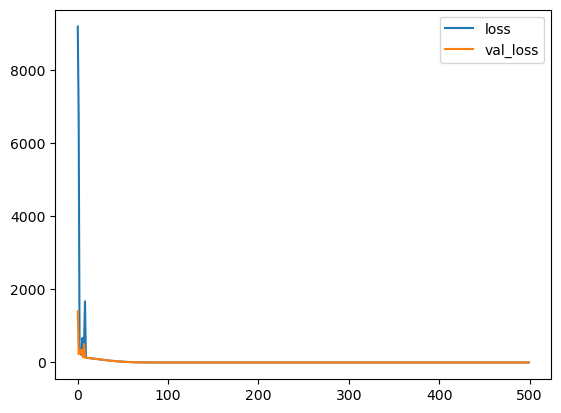

In [339]:
history_model[['loss', 'val_loss']].plot()

<Axes: >

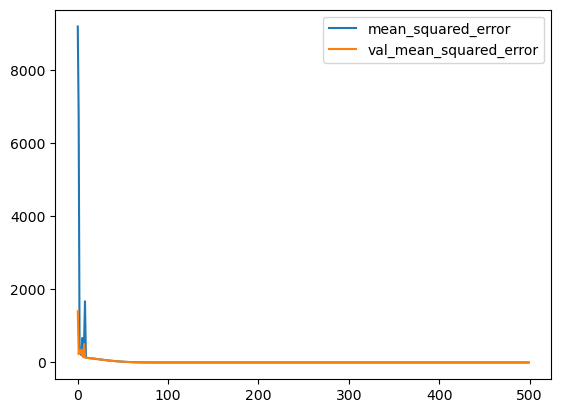

In [340]:
history_model[['mean_squared_error', 'val_mean_squared_error']].plot()

<Axes: >

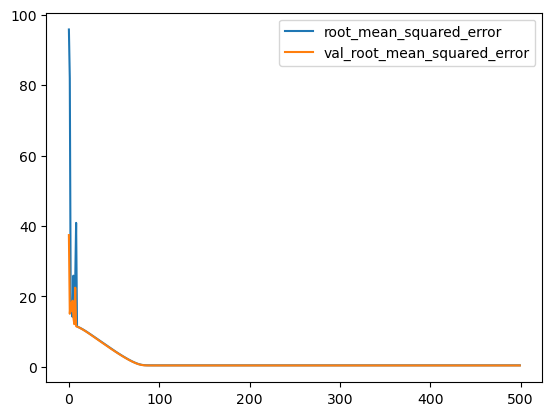

In [341]:
history_model[['root_mean_squared_error', 'val_root_mean_squared_error']].plot()

In [342]:
y_test = np.ravel(y_test)

X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [343]:
y_pred = model.predict(X_test)

14/14 [==============================] - 0s 1ms/step


In [345]:
#Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = True)
print(f"MSE = {mse}")

#Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred, squared = False)
print(f"RMSE = {mse}")

MSE = 100.49188995361328
RMSE = 10.024564743041992
